In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load
statelist_csv = "../data/statelist.csv"
cost_of_living_index_csv = "../data/cost-of-living-index.csv"
income_tax_by_state_csv = "../data/income-tax-by-state.csv"
sales_tax_csv = "../data/sales-tax.csv"
median_house_price_csv = "../data/median-housing-price.csv"
avg_grocery_csv = "../data/Avg-grocery-cost1.csv"
gas_price_csv = "../data/gas-price-per-state1.csv"

In [3]:
#read csv
statelist = pd.read_csv(statelist_csv)

# Income by State

In [4]:
#read income_tax file from data folder

income_tax_by_state = pd.read_csv(income_tax_by_state_csv)

income_tax_by_state.head()

fips       state  densityMi   pop2023   pop2022   pop2020     pop2019  \
0     1     Alabama  100.67620   5098746   5074296   5031362   5006199.4   
1     4     Arizona   65.61541   7453517   7359197   7179943   7101150.4   
2     5    Arkansas   58.86715   3063152   3045637   3014195   3004367.3   
3     6  California  249.81347  38915693  39029342  39501653  39276883.3   
4     8    Colorado   56.62333   5868555   5839926   5784865   5709298.1   

    pop2010  growthRate  growth  growthSince2010  lowestIncomeTaxBracket  \
0   4779736     0.00482   24450          0.06674                   0.020   
1   6392017     0.01282   94320          0.16607                   0.025   
2   2915918     0.00575   17515          0.05049                   0.020   
3  37253956    -0.00291 -113649          0.04461                   0.010   
4   5029196     0.00490   28629          0.16690                   0.044   

   highestIncomeTaxBracket  
0                    0.050  
1                    0.025  
2                    0.049  
3                    0.133  
4                    0.044

In [5]:
#drop unnecessary columns and create new column for average of income tax

income_tax_df = income_tax_by_state.drop(columns=['densityMi', 'pop2023','pop2022', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth', 'fips','growthSince2010'])
income_tax_df['AvgIncomeTax']=income_tax_df[['lowestIncomeTaxBracket', 'highestIncomeTaxBracket']].mean(axis=1)

#drop lowest Income and Highest Income columns
income_tax_df.drop(['lowestIncomeTaxBracket', 'highestIncomeTaxBracket'], axis=1, inplace=True)

#formatting & display results
income_tax_df.AvgIncomeTax = (income_tax_df.AvgIncomeTax * 100).map("{:,.2f}%".format)

income_tax_df.head()

state AvgIncomeTax
0     Alabama        3.50%
1     Arizona        2.50%
2    Arkansas        3.45%
3  California        7.15%
4    Colorado        4.40%

In [6]:
#checking against statelist to see if its missing any state
income_tax_df2 = pd.merge(statelist, income_tax_df, how="left", on=["state"])
income_tax_df2

state AvgIncomeTax
0            Mississippi        5.00%
1               Arkansas        3.45%
2                Alabama        3.50%
3              Louisiana        3.05%
4                 Kansas        4.40%
5               Missouri        3.48%
6               Oklahoma        2.50%
7                  Texas          NaN
8          New Hampshire        4.00%
9              Tennessee          NaN
10               Montana        3.88%
11        South Carolina          NaN
12         Massachusetts        7.00%
13          Rhode Island        4.87%
14               Georgia        3.38%
15               Wyoming          NaN
16            New Jersey        6.08%
17              Kentucky        4.50%
18          North Dakota        2.00%
19                 Maine        6.48%
20        North Carolina        4.75%
21               Vermont        6.05%
22           Connecticut        5.00%
23          South Dakota          NaN
24              Nebraska        4.55%
25              Virginia        3.88%
26                  Iowa        5.20%
27             Wisconsin        5.59%
28             Minnesota        7.60%
29              Delaware        4.40%
30              Colorado        4.40%
31                 Idaho        5.80%
32               Florida          NaN
33         West Virginia        4.75%
34              New York        7.45%
35              Maryland        3.88%
36            New Mexico        3.80%
37              Michigan        4.25%
38                  Ohio        3.38%
39                  Utah        4.85%
40  District of Columbia        7.38%
41               Indiana        3.15%
42          Pennsylvania        3.07%
43                Alaska          NaN
44                Oregon        7.33%
45              Illinois        4.95%
46                Nevada          NaN
47            Washington        7.00%
48               Arizona        2.50%
49                Hawaii        6.20%
50            California        7.15%

In [7]:
#replace NaN with 0
income_tax_df2['AvgIncomeTax'] = income_tax_df2['AvgIncomeTax'].replace(np.nan,"0.00%")
income_tax_df2

state AvgIncomeTax
0            Mississippi        5.00%
1               Arkansas        3.45%
2                Alabama        3.50%
3              Louisiana        3.05%
4                 Kansas        4.40%
5               Missouri        3.48%
6               Oklahoma        2.50%
7                  Texas        0.00%
8          New Hampshire        4.00%
9              Tennessee        0.00%
10               Montana        3.88%
11        South Carolina        0.00%
12         Massachusetts        7.00%
13          Rhode Island        4.87%
14               Georgia        3.38%
15               Wyoming        0.00%
16            New Jersey        6.08%
17              Kentucky        4.50%
18          North Dakota        2.00%
19                 Maine        6.48%
20        North Carolina        4.75%
21               Vermont        6.05%
22           Connecticut        5.00%
23          South Dakota        0.00%
24              Nebraska        4.55%
25              Virginia        3.88%
26                  Iowa        5.20%
27             Wisconsin        5.59%
28             Minnesota        7.60%
29              Delaware        4.40%
30              Colorado        4.40%
31                 Idaho        5.80%
32               Florida        0.00%
33         West Virginia        4.75%
34              New York        7.45%
35              Maryland        3.88%
36            New Mexico        3.80%
37              Michigan        4.25%
38                  Ohio        3.38%
39                  Utah        4.85%
40  District of Columbia        7.38%
41               Indiana        3.15%
42          Pennsylvania        3.07%
43                Alaska        0.00%
44                Oregon        7.33%
45              Illinois        4.95%
46                Nevada        0.00%
47            Washington        7.00%
48               Arizona        2.50%
49                Hawaii        6.20%
50            California        7.15%

In [8]:
# creating a rank column and passing the returned rank series
income_tax_df2["IncomeTaxRank"] = income_tax_df2["AvgIncomeTax"].rank(method='min', ascending=True)
  
# sorting by Avg Income Tax column
income_tax_df2.sort_values("AvgIncomeTax", inplace = True)
  
# display
income_tax_df2

state AvgIncomeTax  IncomeTaxRank
43                Alaska        0.00%            1.0
23          South Dakota        0.00%            1.0
32               Florida        0.00%            1.0
46                Nevada        0.00%            1.0
7                  Texas        0.00%            1.0
15               Wyoming        0.00%            1.0
9              Tennessee        0.00%            1.0
11        South Carolina        0.00%            1.0
18          North Dakota        2.00%            9.0
6               Oklahoma        2.50%           10.0
48               Arizona        2.50%           10.0
3              Louisiana        3.05%           12.0
42          Pennsylvania        3.07%           13.0
41               Indiana        3.15%           14.0
38                  Ohio        3.38%           15.0
14               Georgia        3.38%           15.0
1               Arkansas        3.45%           17.0
5               Missouri        3.48%           18.0
2                Alabama        3.50%           19.0
36            New Mexico        3.80%           20.0
25              Virginia        3.88%           21.0
35              Maryland        3.88%           21.0
10               Montana        3.88%           21.0
8          New Hampshire        4.00%           24.0
37              Michigan        4.25%           25.0
29              Delaware        4.40%           26.0
30              Colorado        4.40%           26.0
4                 Kansas        4.40%           26.0
17              Kentucky        4.50%           29.0
24              Nebraska        4.55%           30.0
33         West Virginia        4.75%           31.0
20        North Carolina        4.75%           31.0
39                  Utah        4.85%           33.0
13          Rhode Island        4.87%           34.0
45              Illinois        4.95%           35.0
0            Mississippi        5.00%           36.0
22           Connecticut        5.00%           36.0
26                  Iowa        5.20%           38.0
27             Wisconsin        5.59%           39.0
31                 Idaho        5.80%           40.0
21               Vermont        6.05%           41.0
16            New Jersey        6.08%           42.0
49                Hawaii        6.20%           43.0
19                 Maine        6.48%           44.0
47            Washington        7.00%           45.0
12         Massachusetts        7.00%           45.0
50            California        7.15%           47.0
44                Oregon        7.33%           48.0
40  District of Columbia        7.38%           49.0
34              New York        7.45%           50.0
28             Minnesota        7.60%           51.0

Analysis: Less Income tax means less expenses, which is prefered.

In [9]:
#export data
income_tax_df2.to_csv("../output/incometaxRank.csv", index=False, header=True)

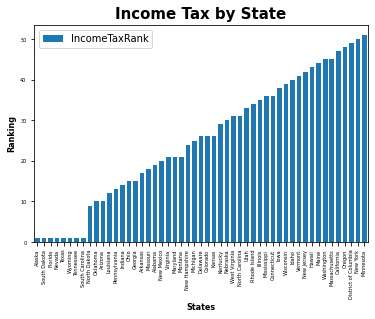

In [12]:
IncomeTaxRanking = income_tax_df2.plot(x='state', y='IncomeTaxRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Income Tax by State', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [13]:
IncomeTaxByState.get_figure().savefig('IncomeTaxRanking.pdf', format='pdf', bbox_inches='tight')

# Sales Tax

In [14]:
# read sales_tax csv file
sales_tax = pd.read_csv(sales_tax_csv)

sales_tax.head()

fips         state   densityMi   pop2023   pop2022   pop2020     pop2019  \
0     6    California   249.81347  38915693  39029342  39501653  39276883.3   
1    18       Indiana   191.27287   6852542   6833037   6788799   6758299.3   
2    28   Mississippi    62.45398   2930528   2940057   2958141   2959056.6   
3    44  Rhode Island  1054.62573   1090483   1093734   1096345   1091967.2   
4    47     Tennessee   173.01630   7134327   7051339   6925619   6867667.6   

    pop2010  growthRate  growth  growthSince2010  stateTaxRate  \
0  37253956    -0.00291 -113649          0.04461        0.0725   
1   6483802     0.00285   19505          0.05687        0.0700   
2   2967297    -0.00324   -9529         -0.01239        0.0700   
3   1052567    -0.00297   -3251          0.03602        0.0700   
4   6346105     0.01177   82988          0.12421        0.0700   

   avgLocalTaxRate  combinedRate  
0           0.0157        0.0882  
1           0.0000        0.0700  
2           0.0007        0.0707  
3           0.0000        0.0700  
4           0.0255        0.0955

In [15]:
#drop unnecessary columns and create new column for average of income tax

sales_tax_df = sales_tax.drop(columns=['densityMi', 'pop2023','pop2022', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth', 'fips','growthSince2010','stateTaxRate', 'avgLocalTaxRate'])

#rename combined Rate column and change format
sales_tax_df.rename(columns={'combinedRate': 'statelocaltax'}, inplace=True)
sales_tax_df.statelocaltax = (sales_tax_df.statelocaltax * 100).map("{:,.2f}%".format)

#display df
sales_tax_df.head()

state statelocaltax
0    California         8.82%
1       Indiana         7.00%
2   Mississippi         7.07%
3  Rhode Island         7.00%
4     Tennessee         9.55%

In [16]:
#checking against statelist to see if its missing any state
sales_tax_df2 = pd.merge(statelist, sales_tax_df, how="left", on=["state"])
sales_tax_df2

state statelocaltax
0            Mississippi         7.07%
1               Arkansas         9.46%
2                Alabama         9.25%
3              Louisiana         9.55%
4                 Kansas         8.66%
5               Missouri         8.33%
6               Oklahoma         8.98%
7                  Texas         8.20%
8          New Hampshire           NaN
9              Tennessee         9.55%
10               Montana           NaN
11        South Carolina         7.43%
12         Massachusetts         6.25%
13          Rhode Island         7.00%
14               Georgia         7.40%
15               Wyoming         5.36%
16            New Jersey         6.59%
17              Kentucky         6.00%
18          North Dakota         6.97%
19                 Maine         5.50%
20        North Carolina         6.99%
21               Vermont         6.30%
22           Connecticut         6.35%
23          South Dakota         6.40%
24              Nebraska         6.95%
25              Virginia         5.75%
26                  Iowa         6.94%
27             Wisconsin         5.43%
28             Minnesota         7.48%
29              Delaware           NaN
30              Colorado         7.78%
31                 Idaho         6.02%
32               Florida         7.02%
33         West Virginia         6.55%
34              New York         8.52%
35              Maryland         6.00%
36            New Mexico         7.72%
37              Michigan         6.00%
38                  Ohio         7.24%
39                  Utah         7.19%
40  District of Columbia         6.00%
41               Indiana         7.00%
42          Pennsylvania         6.34%
43                Alaska           NaN
44                Oregon           NaN
45              Illinois         8.82%
46                Nevada         8.23%
47            Washington         8.86%
48               Arizona         8.37%
49                Hawaii         4.44%
50            California         8.82%

In [17]:
#replace NaN with 0
sales_tax_df2['statelocaltax'] = sales_tax_df2['statelocaltax'].replace(np.nan, "0.00%")
sales_tax_df2

state statelocaltax
0            Mississippi         7.07%
1               Arkansas         9.46%
2                Alabama         9.25%
3              Louisiana         9.55%
4                 Kansas         8.66%
5               Missouri         8.33%
6               Oklahoma         8.98%
7                  Texas         8.20%
8          New Hampshire         0.00%
9              Tennessee         9.55%
10               Montana         0.00%
11        South Carolina         7.43%
12         Massachusetts         6.25%
13          Rhode Island         7.00%
14               Georgia         7.40%
15               Wyoming         5.36%
16            New Jersey         6.59%
17              Kentucky         6.00%
18          North Dakota         6.97%
19                 Maine         5.50%
20        North Carolina         6.99%
21               Vermont         6.30%
22           Connecticut         6.35%
23          South Dakota         6.40%
24              Nebraska         6.95%
25              Virginia         5.75%
26                  Iowa         6.94%
27             Wisconsin         5.43%
28             Minnesota         7.48%
29              Delaware         0.00%
30              Colorado         7.78%
31                 Idaho         6.02%
32               Florida         7.02%
33         West Virginia         6.55%
34              New York         8.52%
35              Maryland         6.00%
36            New Mexico         7.72%
37              Michigan         6.00%
38                  Ohio         7.24%
39                  Utah         7.19%
40  District of Columbia         6.00%
41               Indiana         7.00%
42          Pennsylvania         6.34%
43                Alaska         0.00%
44                Oregon         0.00%
45              Illinois         8.82%
46                Nevada         8.23%
47            Washington         8.86%
48               Arizona         8.37%
49                Hawaii         4.44%
50            California         8.82%

In [18]:
# creating a rank column and passing the returned rank series
sales_tax_df2["StateLocalTaxRank"] = sales_tax_df2["statelocaltax"].rank(method='min', ascending=True)
  
# sorting by state Local sales tax column
sales_tax_df2.sort_values("statelocaltax", inplace = True)
  
# display
sales_tax_df2

state statelocaltax  StateLocalTaxRank
29              Delaware         0.00%                1.0
44                Oregon         0.00%                1.0
43                Alaska         0.00%                1.0
10               Montana         0.00%                1.0
8          New Hampshire         0.00%                1.0
49                Hawaii         4.44%                6.0
15               Wyoming         5.36%                7.0
27             Wisconsin         5.43%                8.0
19                 Maine         5.50%                9.0
25              Virginia         5.75%               10.0
35              Maryland         6.00%               11.0
17              Kentucky         6.00%               11.0
40  District of Columbia         6.00%               11.0
37              Michigan         6.00%               11.0
31                 Idaho         6.02%               15.0
12         Massachusetts         6.25%               16.0
21               Vermont         6.30%               17.0
42          Pennsylvania         6.34%               18.0
22           Connecticut         6.35%               19.0
23          South Dakota         6.40%               20.0
33         West Virginia         6.55%               21.0
16            New Jersey         6.59%               22.0
26                  Iowa         6.94%               23.0
24              Nebraska         6.95%               24.0
18          North Dakota         6.97%               25.0
20        North Carolina         6.99%               26.0
13          Rhode Island         7.00%               27.0
41               Indiana         7.00%               27.0
32               Florida         7.02%               29.0
0            Mississippi         7.07%               30.0
39                  Utah         7.19%               31.0
38                  Ohio         7.24%               32.0
14               Georgia         7.40%               33.0
11        South Carolina         7.43%               34.0
28             Minnesota         7.48%               35.0
36            New Mexico         7.72%               36.0
30              Colorado         7.78%               37.0
7                  Texas         8.20%               38.0
46                Nevada         8.23%               39.0
5               Missouri         8.33%               40.0
48               Arizona         8.37%               41.0
34              New York         8.52%               42.0
4                 Kansas         8.66%               43.0
45              Illinois         8.82%               44.0
50            California         8.82%               44.0
47            Washington         8.86%               46.0
6               Oklahoma         8.98%               47.0
2                Alabama         9.25%               48.0
1               Arkansas         9.46%               49.0
3              Louisiana         9.55%               50.0
9              Tennessee         9.55%               50.0

Analysis: Less State/Local Sales tax means less expenses, which is prefered. 

In [19]:
#export data
sales_tax_df2.to_csv("../output/SalesTaxRank.csv", index=False, header=True)

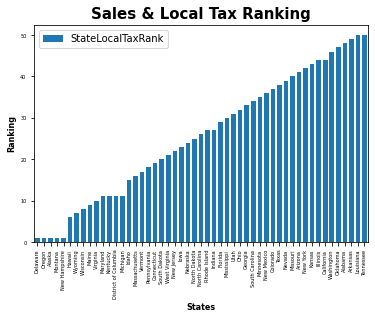

In [20]:
StateLocalTaxRanking = sales_tax_df2.plot(x='state', y='StateLocalTaxRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Sales & Local Tax Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [21]:
StateLocalTaxRanking.get_figure().savefig('StateLocalTaxRanking.pdf', format='pdf', bbox_inches='tight')

# House Price

In [22]:
#read house_price file in data folder 

median_house_price = pd.read_csv(median_house_price_csv)
median_house_price.head()

fips          state  densityMi  pop2023  pop2022  pop2020    pop2019  \
0    54  West Virginia   73.41651  1764786  1775156  1791420  1797577.4   
1    28    Mississippi   62.45398  2930528  2940057  2958141  2959056.6   
2     5       Arkansas   58.86715  3063152  3045637  3014195  3004367.3   
3    40       Oklahoma   59.01851  4048375  4019800  3964912  3943555.9   
4    21       Kentucky  114.42109  4518031  4512310  4507445  4490637.2   

   pop2010  growthRate  growth  growthSince2010  MedianValue  \
0  1852994    -0.00584  -10370         -0.04760       123200   
1  2967297    -0.00324   -9529         -0.01239       125500   
2  2915918     0.00575   17515          0.05049       133600   
3  3751351     0.00711   28575          0.07918       142400   
4  4339367     0.00127    5721          0.04117       147100   

   medianValueZillow  
0           129103.0  
1           157828.0  
2           169867.0  
3           171057.0  
4           188439.0

In [23]:
#drop unneccesary columns

median_house_price_df = median_house_price.drop(columns=['densityMi', 'pop2023','pop2022', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth', 'fips', 'growthSince2010', 'MedianValue'])
median_house_price_df.head()

state  medianValueZillow
0  West Virginia           129103.0
1    Mississippi           157828.0
2       Arkansas           169867.0
3       Oklahoma           171057.0
4       Kentucky           188439.0

In [24]:
#checking against statelist to see if its missing any state
median_house_price_df2 = pd.merge(statelist, median_house_price_df, how="left", on=["state"])

#replace NaN with Zillow Median House Price
median_house_price_df2['medianValueZillow'] = median_house_price_df2['medianValueZillow'].replace(np.nan, 626467)

median_house_price_df2

state  medianValueZillow
0            Mississippi           157828.0
1               Arkansas           169867.0
2                Alabama           194695.0
3              Louisiana           205972.0
4                 Kansas           198199.0
5               Missouri           218208.0
6               Oklahoma           171057.0
7                  Texas           289896.0
8          New Hampshire           411945.0
9              Tennessee           276963.0
10               Montana           428202.0
11        South Carolina           269186.0
12         Massachusetts           559312.0
13          Rhode Island           412897.0
14               Georgia           295159.0
15               Wyoming           308862.0
16            New Jersey           441762.0
17              Kentucky           188439.0
18          North Dakota           266763.0
19                 Maine           344592.0
20        North Carolina           296021.0
21               Vermont           336310.0
22           Connecticut           343687.0
23          South Dakota           277809.0
24              Nebraska           230672.0
25              Virginia           358447.0
26                  Iowa           183418.0
27             Wisconsin           251655.0
28             Minnesota           323515.0
29              Delaware           337543.0
30              Colorado           559838.0
31                 Idaho           466435.0
32               Florida           358018.0
33         West Virginia           129103.0
34              New York           382663.0
35              Maryland           390608.0
36            New Mexico           277617.0
37              Michigan           225324.0
38                  Ohio           199959.0
39                  Utah           544868.0
40  District of Columbia           626467.0
41               Indiana           210166.0
42          Pennsylvania           254597.0
43                Alaska           312988.0
44                Oregon           502215.0
45              Illinois           253433.0
46                Nevada           434832.0
47            Washington           595732.0
48               Arizona           416433.0
49                Hawaii           848926.0
50            California           760800.0

In [25]:
# creating a rank column and passing the returned rank series
median_house_price_df2["HousePriceRank"] = median_house_price_df2["medianValueZillow"].rank(method='min', ascending=True)
  
# sorting by median Value zillow column
median_house_price_df2.sort_values("medianValueZillow", inplace = True)
  
# display
median_house_price_df2

state  medianValueZillow  HousePriceRank
33         West Virginia           129103.0             1.0
0            Mississippi           157828.0             2.0
1               Arkansas           169867.0             3.0
6               Oklahoma           171057.0             4.0
26                  Iowa           183418.0             5.0
17              Kentucky           188439.0             6.0
2                Alabama           194695.0             7.0
4                 Kansas           198199.0             8.0
38                  Ohio           199959.0             9.0
3              Louisiana           205972.0            10.0
41               Indiana           210166.0            11.0
5               Missouri           218208.0            12.0
37              Michigan           225324.0            13.0
24              Nebraska           230672.0            14.0
27             Wisconsin           251655.0            15.0
45              Illinois           253433.0            16.0
42          Pennsylvania           254597.0            17.0
18          North Dakota           266763.0            18.0
11        South Carolina           269186.0            19.0
9              Tennessee           276963.0            20.0
36            New Mexico           277617.0            21.0
23          South Dakota           277809.0            22.0
7                  Texas           289896.0            23.0
14               Georgia           295159.0            24.0
20        North Carolina           296021.0            25.0
15               Wyoming           308862.0            26.0
43                Alaska           312988.0            27.0
28             Minnesota           323515.0            28.0
21               Vermont           336310.0            29.0
29              Delaware           337543.0            30.0
22           Connecticut           343687.0            31.0
19                 Maine           344592.0            32.0
32               Florida           358018.0            33.0
25              Virginia           358447.0            34.0
34              New York           382663.0            35.0
35              Maryland           390608.0            36.0
8          New Hampshire           411945.0            37.0
13          Rhode Island           412897.0            38.0
48               Arizona           416433.0            39.0
10               Montana           428202.0            40.0
46                Nevada           434832.0            41.0
16            New Jersey           441762.0            42.0
31                 Idaho           466435.0            43.0
44                Oregon           502215.0            44.0
39                  Utah           544868.0            45.0
12         Massachusetts           559312.0            46.0
30              Colorado           559838.0            47.0
47            Washington           595732.0            48.0
40  District of Columbia           626467.0            49.0
50            California           760800.0            50.0
49                Hawaii           848926.0            51.0

Analysis: Lower House Price means less expenses and more affordability, which is prefered.

In [26]:
#export data
median_house_price_df2.to_csv("../output/HousePriceRank.csv", index=False, header=True)

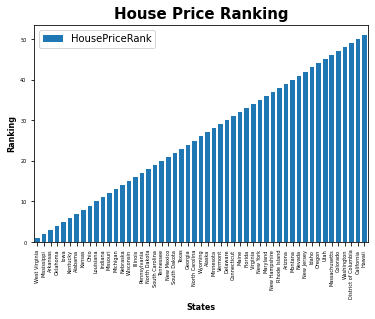

In [27]:
HousePriceRanking = median_house_price_df2.plot(x='state', y='HousePriceRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('House Price Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [28]:
HousePriceRanking.get_figure().savefig('HousePriceRanking.pdf', format='pdf', bbox_inches='tight')

# Average Grocery Expense per person by State

In [29]:
avg_grocery = pd.read_csv(avg_grocery_csv)
avg_grocery.head()

Rank          state City analyzed (population)  \
0     1         Hawaii         Honolulu (337,200)   
1     2        Vermont        Burlington (42,400)   
2     3         Alaska        Anchorage (291,800)   
3     4       New York      New York City (8.17M)   
4     5  West Virginia        Charleston (51,400)   

  Average monthly cost of groceries per person  
0                                     $556.76   
1                                     $497.41   
2                                     $483.24   
3                                     $482.87   
4                                     $427.19

In [30]:
avg_grocery_df = avg_grocery.drop(columns=['City analyzed (population)', 'Rank'])
avg_grocery_df.head()

state Average monthly cost of groceries per person
0         Hawaii                                     $556.76 
1        Vermont                                     $497.41 
2         Alaska                                     $483.24 
3       New York                                     $482.87 
4  West Virginia                                     $427.19

In [31]:
#checking against statelist to see if its missing any state
avg_grocery_df2 = pd.merge(statelist, avg_grocery_df, how="left", on=["state"])

#replace NaN with $520 (Google/Sofi.com)
avg_grocery_df2['Average monthly cost of groceries per person'] = avg_grocery_df2['Average monthly cost of groceries per person'].replace(np.nan, "$520.00")

avg_grocery_df2

state Average monthly cost of groceries per person
0            Mississippi                                     $423.33 
1               Arkansas                                     $282.46 
2                Alabama                                     $397.39 
3              Louisiana                                     $325.19 
4                 Kansas                                     $261.35 
5               Missouri                                     $312.63 
6               Oklahoma                                     $346.37 
7                  Texas                                     $286.64 
8          New Hampshire                                     $183.00 
9              Tennessee                                     $346.37 
10               Montana                                     $323.91 
11        South Carolina                                     $411.29 
12         Massachusetts                                     $406.21 
13          Rhode Island                                     $390.19 
14               Georgia                                     $397.97 
15               Wyoming                                     $345.62 
16            New Jersey                                     $343.67 
17              Kentucky                                     $315.20 
18          North Dakota                                     $326.66 
19                 Maine                                     $372.21 
20        North Carolina                                     $341.10 
21               Vermont                                     $497.41 
22           Connecticut                                     $343.30 
23          South Dakota                                     $286.23 
24              Nebraska                                     $336.90 
25              Virginia                                     $298.01 
26                  Iowa                                     $347.05 
27             Wisconsin                                     $385.97 
28             Minnesota                                     $395.39 
29              Delaware                                     $380.39 
30              Colorado                                     $326.92 
31                 Idaho                                     $281.12 
32               Florida                                     $364.25 
33         West Virginia                                     $427.19 
34              New York                                     $482.87 
35              Maryland                                     $343.67 
36            New Mexico                                     $307.79 
37              Michigan                                     $327.12 
38                  Ohio                                     $341.48 
39                  Utah                                     $282.23 
40  District of Columbia                                      $520.00
41               Indiana                                     $318.03 
42          Pennsylvania                                     $401.02 
43                Alaska                                     $483.24 
44                Oregon                                     $375.41 
45              Illinois                                     $327.31 
46                Nevada                                     $293.43 
47            Washington                                     $402.08 
48               Arizona                                     $302.80 
49                Hawaii                                     $556.76 
50            California                                     $370.96

In [32]:
# creating a rank column and passing the returned rank series
avg_grocery_df2["AvgGroceryRank"] = avg_grocery_df2["Average monthly cost of groceries per person"].rank(method='min', ascending=True)
  
# sorting By Avg Monthly grocery Cost per person column
avg_grocery_df2.sort_values("Average monthly cost of groceries per person", inplace = True)
  
# display
avg_grocery_df2

state Average monthly cost of groceries per person  \
8          New Hampshire                                     $183.00    
4                 Kansas                                     $261.35    
31                 Idaho                                     $281.12    
39                  Utah                                     $282.23    
1               Arkansas                                     $282.46    
23          South Dakota                                     $286.23    
7                  Texas                                     $286.64    
46                Nevada                                     $293.43    
25              Virginia                                     $298.01    
48               Arizona                                     $302.80    
36            New Mexico                                     $307.79    
5               Missouri                                     $312.63    
17              Kentucky                                     $315.20    
41               Indiana                                     $318.03    
10               Montana                                     $323.91    
3              Louisiana                                     $325.19    
18          North Dakota                                     $326.66    
30              Colorado                                     $326.92    
37              Michigan                                     $327.12    
45              Illinois                                     $327.31    
24              Nebraska                                     $336.90    
20        North Carolina                                     $341.10    
38                  Ohio                                     $341.48    
22           Connecticut                                     $343.30    
35              Maryland                                     $343.67    
16            New Jersey                                     $343.67    
15               Wyoming                                     $345.62    
9              Tennessee                                     $346.37    
6               Oklahoma                                     $346.37    
26                  Iowa                                     $347.05    
32               Florida                                     $364.25    
50            California                                     $370.96    
19                 Maine                                     $372.21    
44                Oregon                                     $375.41    
29              Delaware                                     $380.39    
27             Wisconsin                                     $385.97    
13          Rhode Island                                     $390.19    
28             Minnesota                                     $395.39    
2                Alabama                                     $397.39    
14               Georgia                                     $397.97    
42          Pennsylvania                                     $401.02    
47            Washington                                     $402.08    
12         Massachusetts                                     $406.21    
11        South Carolina                                     $411.29    
0            Mississippi                                     $423.33    
33         West Virginia                                     $427.19    
34              New York                                     $482.87    
43                Alaska                                     $483.24    
21               Vermont                                     $497.41    
40  District of Columbia                                      $520.00   
49                Hawaii                                     $556.76    

    AvgGroceryRank  
8              1.0  
4              2.0  
31             3.0  
39             4.0  
1              5.0  
23             6.0  
7              7.0  
46             8.0  
25             9.0  
48          

Analysis: Less Monthly Grocery cost means less expense, and more affordability. 

In [33]:
#export data
avg_grocery_df2.to_csv("../output/GroceryExpenseRank.csv", index=False, header=True)

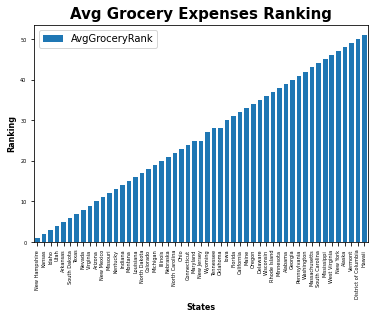

In [34]:
AvgGroceryRanking = avg_grocery_df2.plot(x='state', y='AvgGroceryRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Avg Grocery Expenses Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [35]:
AvgGroceryRanking.get_figure().savefig('AvgGroceryRanking.pdf', format='pdf', bbox_inches='tight')

# Gas Price per State

In [36]:
gas_price_df = pd.read_csv(gas_price_csv)
gas_price_df.head()

state   Regular 
0      Alaska     3.863
1     Alabama     3.290
2    Arkansas     3.208
3     Arizona     4.527
4  California     4.892

In [37]:
columns = [col.strip() for col in gas_price_df.columns]
gas_price_df.columns = columns

In [38]:
list(gas_price_df.columns)[1]

'Regular'

In [39]:
#checking against statelist to see if its missing any state
gas_price_df2 = pd.merge(statelist, gas_price_df, how="left", on=["state"])

gas_price_df2

state  Regular
0            Mississippi    3.156
1               Arkansas    3.208
2                Alabama    3.290
3              Louisiana    3.291
4                 Kansas    3.303
5               Missouri    3.306
6               Oklahoma    3.314
7                  Texas    3.324
8          New Hampshire    3.330
9              Tennessee    3.349
10               Montana    3.357
11        South Carolina    3.358
12         Massachusetts    3.374
13          Rhode Island    3.392
14               Georgia    3.392
15               Wyoming    3.396
16            New Jersey    3.430
17              Kentucky    3.444
18          North Dakota    3.449
19                 Maine    3.457
20        North Carolina    3.470
21               Vermont    3.472
22           Connecticut    3.477
23          South Dakota    3.503
24              Nebraska    3.506
25              Virginia    3.506
26                  Iowa    3.518
27             Wisconsin    3.534
28             Minnesota    3.536
29              Delaware    3.553
30              Colorado    3.556
31                 Idaho    3.559
32               Florida    3.571
33         West Virginia    3.572
34              New York    3.584
35              Maryland    3.597
36            New Mexico    3.606
37              Michigan    3.636
38                  Ohio    3.639
39                  Utah    3.657
40  District of Columbia    3.718
41               Indiana    3.722
42          Pennsylvania    3.742
43                Alaska    3.863
44                Oregon    4.010
45              Illinois    4.060
46                Nevada    4.250
47            Washington    4.437
48               Arizona    4.527
49                Hawaii    4.786
50            California    4.892

In [40]:
# creating a rank column and passing the returned rank series
gas_price_df2["GasPriceRank"] = gas_price_df2["Regular"].rank(method='min', ascending=True)
  
# sorting By Avg Monthly grocery Cost per person column
gas_price_df2.sort_values("Regular", inplace = True)
  
# display
gas_price_df2

state  Regular  GasPriceRank
0            Mississippi    3.156           1.0
1               Arkansas    3.208           2.0
2                Alabama    3.290           3.0
3              Louisiana    3.291           4.0
4                 Kansas    3.303           5.0
5               Missouri    3.306           6.0
6               Oklahoma    3.314           7.0
7                  Texas    3.324           8.0
8          New Hampshire    3.330           9.0
9              Tennessee    3.349          10.0
10               Montana    3.357          11.0
11        South Carolina    3.358          12.0
12         Massachusetts    3.374          13.0
13          Rhode Island    3.392          14.0
14               Georgia    3.392          14.0
15               Wyoming    3.396          16.0
16            New Jersey    3.430          17.0
17              Kentucky    3.444          18.0
18          North Dakota    3.449          19.0
19                 Maine    3.457          20.0
20        North Carolina    3.470          21.0
21               Vermont    3.472          22.0
22           Connecticut    3.477          23.0
23          South Dakota    3.503          24.0
25              Virginia    3.506          25.0
24              Nebraska    3.506          25.0
26                  Iowa    3.518          27.0
27             Wisconsin    3.534          28.0
28             Minnesota    3.536          29.0
29              Delaware    3.553          30.0
30              Colorado    3.556          31.0
31                 Idaho    3.559          32.0
32               Florida    3.571          33.0
33         West Virginia    3.572          34.0
34              New York    3.584          35.0
35              Maryland    3.597          36.0
36            New Mexico    3.606          37.0
37              Michigan    3.636          38.0
38                  Ohio    3.639          39.0
39                  Utah    3.657          40.0
40  District of Columbia    3.718          41.0
41               Indiana    3.722          42.0
42          Pennsylvania    3.742          43.0
43                Alaska    3.863          44.0
44                Oregon    4.010          45.0
45              Illinois    4.060          46.0
46                Nevada    4.250          47.0
47            Washington    4.437          48.0
48               Arizona    4.527          49.0
49                Hawaii    4.786          50.0
50            California    4.892          51.0

Analysis: Less Gas Price means less expense and more affordability. 

In [41]:
#export data
gas_price_df2.to_csv("../output/GasPriceRank.csv", index=False, header=True)

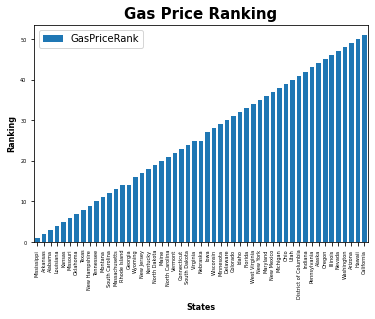

In [42]:
GasPriceRanking = gas_price_df2.plot(x='state', y='GasPriceRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Gas Price Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [43]:
GasPriceRanking.get_figure().savefig('GasPriceRanking.pdf', format='pdf', bbox_inches='tight')

# Merging Data 

In [44]:
#merge income_tax and house_price by state
cost_of_living_merge1 = pd.merge(sales_tax_df2, income_tax_df2,  how = "left", on=["state"])

#drop columns
cost_of_living_merge1.drop(['AvgIncomeTax', 'statelocaltax'],axis=1, inplace=True)

cost_of_living_merge1

state  StateLocalTaxRank  IncomeTaxRank
0               Delaware                1.0           26.0
1                 Oregon                1.0           48.0
2                 Alaska                1.0            1.0
3                Montana                1.0           21.0
4          New Hampshire                1.0           24.0
5                 Hawaii                6.0           43.0
6                Wyoming                7.0            1.0
7              Wisconsin                8.0           39.0
8                  Maine                9.0           44.0
9               Virginia               10.0           21.0
10              Maryland               11.0           21.0
11              Kentucky               11.0           29.0
12  District of Columbia               11.0           49.0
13              Michigan               11.0           25.0
14                 Idaho               15.0           40.0
15         Massachusetts               16.0           45.0
16               Vermont               17.0           41.0
17          Pennsylvania               18.0           13.0
18           Connecticut               19.0           36.0
19          South Dakota               20.0            1.0
20         West Virginia               21.0           31.0
21            New Jersey               22.0           42.0
22                  Iowa               23.0           38.0
23              Nebraska               24.0           30.0
24          North Dakota               25.0            9.0
25        North Carolina               26.0           31.0
26          Rhode Island               27.0           34.0
27               Indiana               27.0           14.0
28               Florida               29.0            1.0
29           Mississippi               30.0           36.0
30                  Utah               31.0           33.0
31                  Ohio               32.0           15.0
32               Georgia               33.0           15.0
33        South Carolina               34.0            1.0
34             Minnesota               35.0           51.0
35            New Mexico               36.0           20.0
36              Colorado               37.0           26.0
37                 Texas               38.0            1.0
38                Nevada               39.0            1.0
39              Missouri               40.0           18.0
40               Arizona               41.0           10.0
41              New York               42.0           50.0
42                Kansas               43.0           26.0
43              Illinois               44.0           35.0
44            California               44.0           47.0
45            Washington               46.0           45.0
46              Oklahoma               47.0           10.0
47               Alabama               48.0           19.0
48              Arkansas               49.0           17.0
49             Louisiana               50.0           12.0
50             Tennessee               50.0            1.0

In [45]:
cost_of_living_merge2 = pd.merge(cost_of_living_merge1, median_house_price_df2, how="left", on=["state"])
cost_of_living_merge2.drop(['medianValueZillow'],axis=1, inplace=True)
cost_of_living_merge2.head()

state  StateLocalTaxRank  IncomeTaxRank  HousePriceRank
0       Delaware                1.0           26.0            30.0
1         Oregon                1.0           48.0            44.0
2         Alaska                1.0            1.0            27.0
3        Montana                1.0           21.0            40.0
4  New Hampshire                1.0           24.0            37.0

In [46]:
cost_of_living_merge3 = pd.merge(cost_of_living_merge2, avg_grocery_df2, how="left", on=["state"])
cost_of_living_merge3.drop(['Average monthly cost of groceries per person'],axis=1, inplace=True)
cost_of_living_merge3.head()

state  StateLocalTaxRank  IncomeTaxRank  HousePriceRank  \
0       Delaware                1.0           26.0            30.0   
1         Oregon                1.0           48.0            44.0   
2         Alaska                1.0            1.0            27.0   
3        Montana                1.0           21.0            40.0   
4  New Hampshire                1.0           24.0            37.0   

   AvgGroceryRank  
0            35.0  
1            34.0  
2            48.0  
3            15.0  
4             1.0

In [47]:
cost_of_living_merge4 = pd.merge(cost_of_living_merge3, gas_price_df2, how="left", on=["state"])
cost_of_living_merge4.drop(['Regular'],axis=1, inplace=True)
cost_of_living_merge4.head()

state  StateLocalTaxRank  IncomeTaxRank  HousePriceRank  \
0       Delaware                1.0           26.0            30.0   
1         Oregon                1.0           48.0            44.0   
2         Alaska                1.0            1.0            27.0   
3        Montana                1.0           21.0            40.0   
4  New Hampshire                1.0           24.0            37.0   

   AvgGroceryRank  GasPriceRank  
0            35.0          30.0  
1            34.0          45.0  
2            48.0          44.0  
3            15.0          11.0  
4             1.0           9.0

# Rating and Analysis

In [48]:
CostOfLiving_Rank = pd.DataFrame(cost_of_living_merge4)

CostOfLiving_Rank

state  StateLocalTaxRank  IncomeTaxRank  HousePriceRank  \
0               Delaware                1.0           26.0            30.0   
1                 Oregon                1.0           48.0            44.0   
2                 Alaska                1.0            1.0            27.0   
3                Montana                1.0           21.0            40.0   
4          New Hampshire                1.0           24.0            37.0   
5                 Hawaii                6.0           43.0            51.0   
6                Wyoming                7.0            1.0            26.0   
7              Wisconsin                8.0           39.0            15.0   
8                  Maine                9.0           44.0            32.0   
9               Virginia               10.0           21.0            34.0   
10              Maryland               11.0           21.0            36.0   
11              Kentucky               11.0           29.0             6.0   
12  District of Columbia               11.0           49.0            49.0   
13              Michigan               11.0           25.0            13.0   
14                 Idaho               15.0           40.0            43.0   
15         Massachusetts               16.0           45.0            46.0   
16               Vermont               17.0           41.0            29.0   
17          Pennsylvania               18.0           13.0            17.0   
18           Connecticut               19.0           36.0            31.0   
19          South Dakota               20.0            1.0            22.0   
20         West Virginia               21.0           31.0             1.0   
21            New Jersey               22.0           42.0            42.0   
22                  Iowa               23.0           38.0             5.0   
23              Nebraska               24.0           30.0            14.0   
24          North Dakota               25.0            9.0            18.0   
25        North Carolina               26.0           31.0            25.0   
26          Rhode Island               27.0           34.0            38.0   
27               Indiana               27.0           14.0            11.0   
28               Florida               29.0            1.0            33.0   
29           Mississippi               30.0           36.0             2.0   
30                  Utah               31.0           33.0            45.0   
31                  Ohio               32.0           15.0             9.0   
32               Georgia               33.0           15.0            24.0   
33        South Carolina               34.0            1.0            19.0   
34             Minnesota               35.0           51.0            28.0   
35            New Mexico               36.0           20.0            21.0   
36              Colorado               37.0           26.0            47.0   
37                 Texas               38.0            1.0            23.0   
38                Nevada               39.0            1.0            41.0   
39              Missouri               40.0           18.0            12.0   
40               Arizona               41.0           10.0            39.0   
41              New York               42.0           50.0            35.0   
42                Kansas               43.0           26.0             8.0   
43              Illinois               44.0           35.0            16.0   
44            California               44.0           47.0            50.0   
45            Washington               46.0           45.0            48.0   
46              Oklahoma               47.0           10.0             4.0   
47               Alabama               48.0           19.0             7.0   
48              Arkansas               49.0           17.0             3.0   
49             Louisiana               50.0           12.0            10.0   
50             Tennessee               50

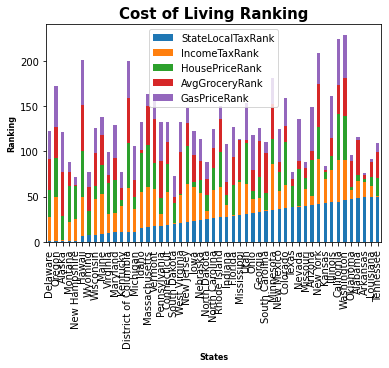

In [49]:
CostOfLiving_Rank.plot.bar(x='state', stacked=True, title='Cost of Living Ranking')

plt.title('Cost of Living Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [50]:
#Calculate Total Score 

CostOfLiving_Rank['TotalScore'] = cost_of_living_merge4['IncomeTaxRank'] + cost_of_living_merge4['StateLocalTaxRank'] + cost_of_living_merge4['HousePriceRank'] + cost_of_living_merge4['AvgGroceryRank'] + cost_of_living_merge4['GasPriceRank']

#Average Rank Score
CostOfLiving_Rank['CostOfLiving_RankScore'] = CostOfLiving_Rank['TotalScore']/5

CostOfLiving_Rank


state  StateLocalTaxRank  IncomeTaxRank  HousePriceRank  \
0               Delaware                1.0           26.0            30.0   
1                 Oregon                1.0           48.0            44.0   
2                 Alaska                1.0            1.0            27.0   
3                Montana                1.0           21.0            40.0   
4          New Hampshire                1.0           24.0            37.0   
5                 Hawaii                6.0           43.0            51.0   
6                Wyoming                7.0            1.0            26.0   
7              Wisconsin                8.0           39.0            15.0   
8                  Maine                9.0           44.0            32.0   
9               Virginia               10.0           21.0            34.0   
10              Maryland               11.0           21.0            36.0   
11              Kentucky               11.0           29.0             6.0   
12  District of Columbia               11.0           49.0            49.0   
13              Michigan               11.0           25.0            13.0   
14                 Idaho               15.0           40.0            43.0   
15         Massachusetts               16.0           45.0            46.0   
16               Vermont               17.0           41.0            29.0   
17          Pennsylvania               18.0           13.0            17.0   
18           Connecticut               19.0           36.0            31.0   
19          South Dakota               20.0            1.0            22.0   
20         West Virginia               21.0           31.0             1.0   
21            New Jersey               22.0           42.0            42.0   
22                  Iowa               23.0           38.0             5.0   
23              Nebraska               24.0           30.0            14.0   
24          North Dakota               25.0            9.0            18.0   
25        North Carolina               26.0           31.0            25.0   
26          Rhode Island               27.0           34.0            38.0   
27               Indiana               27.0           14.0            11.0   
28               Florida               29.0            1.0            33.0   
29           Mississippi               30.0           36.0             2.0   
30                  Utah               31.0           33.0            45.0   
31                  Ohio               32.0           15.0             9.0   
32               Georgia               33.0           15.0            24.0   
33        South Carolina               34.0            1.0            19.0   
34             Minnesota               35.0           51.0            28.0   
35            New Mexico               36.0           20.0            21.0   
36              Colorado               37.0           26.0            47.0   
37                 Texas               38.0            1.0            23.0   
38                Nevada               39.0            1.0            41.0   
39              Missouri               40.0           18.0            12.0   
40               Arizona               41.0           10.0            39.0   
41              New York               42.0           50.0            35.0   
42                Kansas               43.0           26.0             8.0   
43              Illinois               44.0           35.0            16.0   
44            California               44.0           47.0            50.0   
45            Washington               46.0           45.0            48.0   
46              Oklahoma               47.0           10.0             4.0   
47               Alabama               48.0           19.0             7.0   
48              Arkansas               49.0           17.0             3.0   
49             Louisiana               50.0           12.0            10.0   
50             Tennessee               50

In [51]:
#export data
CostOfLiving_Rank.to_csv("../output/CostOfLiving_Rank.csv", index=False, header=True)

In [52]:
AvgCostOfLiving = CostOfLiving_Rank.drop(columns=['StateLocalTaxRank', 'IncomeTaxRank', 'HousePriceRank', 'AvgGroceryRank', 'GasPriceRank', 'TotalScore'])

AvgCostOfLiving1 = AvgCostOfLiving.sort_values(by='CostOfLiving_RankScore', ascending=True)

AvgCostOfLiving1
                    

state  CostOfLiving_RankScore
4          New Hampshire                    14.4
19          South Dakota                    14.6
48              Arkansas                    15.2
6                Wyoming                    15.4
11              Kentucky                    15.4
37                 Texas                    15.4
42                Kansas                    16.8
39              Missouri                    17.6
3                Montana                    17.6
24          North Dakota                    17.6
49             Louisiana                    18.4
46              Oklahoma                    19.2
9               Virginia                    19.8
13              Michigan                    21.2
27               Indiana                    21.6
50             Tennessee                    21.8
33        South Carolina                    22.0
29           Mississippi                    22.8
23              Nebraska                    22.8
47               Alabama                    23.2
31                  Ohio                    23.6
2                 Alaska                    24.2
0               Delaware                    24.4
22                  Iowa                    24.6
25        North Carolina                    25.0
35            New Mexico                    25.0
7              Wisconsin                    25.2
32               Georgia                    25.2
28               Florida                    25.4
10              Maryland                    25.8
17          Pennsylvania                    26.4
20         West Virginia                    26.6
18           Connecticut                    26.6
14                 Idaho                    26.6
38                Nevada                    27.2
8                  Maine                    27.6
21            New Jersey                    29.6
40               Arizona                    29.8
26          Rhode Island                    30.0
30                  Utah                    30.6
16               Vermont                    31.6
36              Colorado                    31.8
43              Illinois                    32.2
15         Massachusetts                    32.6
1                 Oregon                    34.4
34             Minnesota                    36.2
12  District of Columbia                    40.0
5                 Hawaii                    40.2
41              New York                    41.8
44            California                    44.8
45            Washington                    45.8

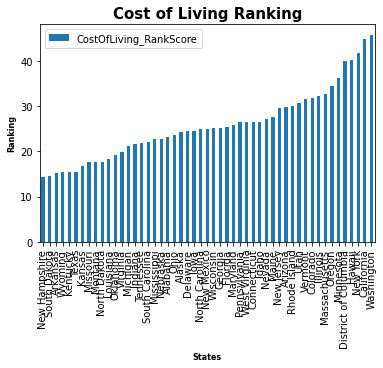

In [53]:
AvgCostOfLiving1.plot.bar(x='state', stacked=True, title='Cost of Living Ranking')

plt.title('Cost of Living Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [54]:
AvgCostOfLiving1.get_figure().savefig('AvgCostOfLiving.pdf', format='pdf', bbox_inches='tight')

AttributeError: 'DataFrame' object has no attribute 'get_figure'

CHALLENGE: Issues with Missing States and Missing Values in some files, resulting in replacing with 0 or Manual Google search. This causes the discrepancy in dtypes and cannot graph with actual values. If have more time, Will edit the dtypes to provide graphs with more specific data instead of only ranking. 